<a href="https://colab.research.google.com/github/MuskaanMa876/credit-card-fraud-detection/blob/main/Credit_card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install -U kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00


In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
credit_card_data=pd.read_csv('/content/creditcard.csv')

In [11]:
# first five sets of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
# datasets information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# check the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
# distribution  of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

NameError: name 'credit_card_data' is not defined

This Dataset is highly unbalanced

0--> Normal Transaction
1-->Fraudulent transaction

In [16]:
# seperating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [17]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [18]:
# statistical measures of the data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [19]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [20]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [21]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under sampling


Build a sample dataset containing a similar distribution of normal transactions and Fraudulent Transactions
Number of Fraudulent transactions --> 492


In [22]:
legit_sample=legit.sample(n=492)

Concatenating two data frames

In [23]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [24]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2772,2311.0,1.166871,0.609586,0.194726,2.430477,0.049670,-0.660894,0.384504,-0.076710,-1.136901,...,0.036737,-0.018542,-0.078136,0.512464,0.629186,0.042115,-0.052041,-0.000289,5.32,0
84542,60352.0,-1.175601,1.334395,1.755406,0.378010,-0.436982,-1.099019,0.549372,-0.258197,-0.153421,...,-0.126130,-0.511020,-0.033813,0.898964,-0.365491,0.097554,-0.340741,0.159117,9.85,0
86597,61301.0,-0.939613,0.241196,1.106410,-2.287558,-0.056024,0.978851,-0.761131,0.854900,-1.272013,...,0.442195,1.137915,-0.435868,-1.653326,0.305672,-0.064715,0.236608,0.060920,14.00,0
54744,46595.0,-0.763677,0.930581,1.352257,-1.265749,-0.044920,-1.074703,1.110521,-0.348954,-0.350028,...,-0.104101,-0.378776,-0.085471,0.459783,-0.345497,0.616149,-0.223021,0.082566,49.95,0
120754,75949.0,1.409202,-0.598076,-1.387345,-1.664376,1.530313,3.122143,-1.151104,0.811880,-0.868849,...,0.006026,-0.250102,-0.053802,0.919078,0.518209,-0.269369,0.028153,0.042371,29.90,0


In [25]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [26]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [27]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95860.268293,0.034429,0.092719,0.067350,-0.102812,-0.014956,0.061614,-0.015147,0.102985,-0.058478,...,-0.023874,-0.008111,0.000257,0.018796,0.010922,0.014432,0.003921,0.003990,-0.000610,73.532561
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [28]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [23]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
24924    33440.0  0.877427 -0.330970  0.259926  0.586778  0.052965  0.853647   
134210   80700.0 -1.970064 -1.741241  2.191761 -1.446943  1.073279 -1.512522   
88815    62308.0 -1.171411  1.079213 -1.100205 -0.151778  2.112163  3.309863   
80627    58576.0  1.256399  0.402563  0.319918  0.687153 -0.312050 -1.057312   
195193  130941.0 -0.772457 -0.246882  0.923664 -1.459437  0.564417  0.359688   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [29]:
print(Y)

2772      0
84542     0
86597     0
54744     0
120754    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train, X_test.shape)

(984, 30)             Time         V1        V2         V3        V4         V5  \
100623   67571.0  -0.758469 -0.045410  -0.168438 -1.313275  -1.901763   
183207  125700.0   1.872194 -0.303126  -1.203378  1.421072   0.066468   
92633    64022.0  -3.042733 -0.095973   1.654987 -3.196483  -0.253013   
263385  160931.0   2.064208  0.307318  -2.663015  0.421641   1.121310   
72257    54634.0  -1.252137 -1.023801   0.257734 -1.334849  -2.549826   
...          ...        ...       ...        ...       ...        ...   
178773  123776.0   1.938464 -0.891713  -1.040708 -0.339389  -0.932082   
98140    66537.0  -1.580190  1.585099   2.283981  3.023843  -0.837276   
223618  143456.0  -2.006582  3.676577  -5.463811  7.232058  -1.627859   
43061    41353.0 -15.020981  8.075240 -16.298091  5.664820 -11.918153   
279193  168700.0  -0.448174  0.617417  -1.780007 -0.049690   3.109925   

              V6         V7        V8        V9  ...       V20       V21  \
100623  0.739433   3.071892 -0.483422

Model Training

Logistic Regression

In [31]:
model = LogisticRegression()

Saving creditcard.csv to creditcard (2).csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0

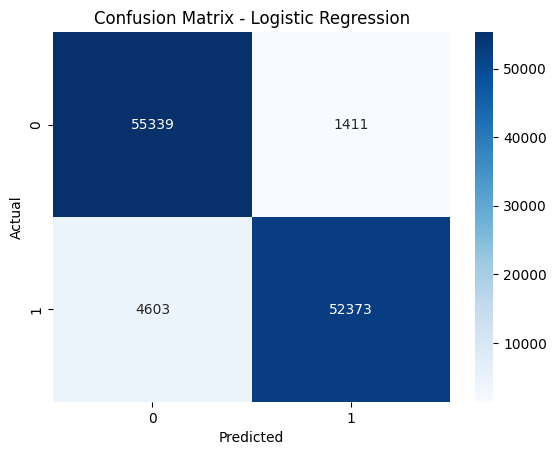


========== Decision Tree Classifier ==========
Accuracy: 0.9983
Precision: 0.9975
Recall: 0.9991
F1 Score: 0.9983
AUC-ROC: 0.9983


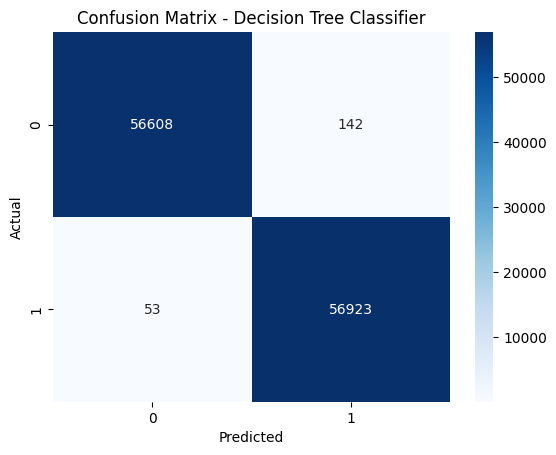

['fraud_detection_model.pkl']

In [32]:
# 📌 Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from imblearn.over_sampling import SMOTE  # Handle class imbalance

# 📌 Step 2: Load Dataset (Download from Kaggle)
from google.colab import files
uploaded = files.upload()  # Upload 'creditcard.csv' manually in Colab

df = pd.read_csv("creditcard.csv")

# 📌 Step 3: Explore Dataset
print(df.head())
print(df.info())
print(df["Class"].value_counts())  # Check class imbalance

# 📌 Step 4: Feature Engineering & Preprocessing
# Drop 'Time' column (not useful for fraud detection)
df.drop(columns=['Time'], inplace=True)

# Separate Features and Target
X = df.drop(columns=['Class'])
Y = df['Class']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Step 5: Handle Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

# 📌 Step 6: Split Data into Training & Testing
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# 📌 Step 7: Train & Evaluate Models
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifiers.items():
    print(f"\n========== {name} ==========")
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)

    print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(Y_test, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(Y_test, y_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(Y_test, y_pred, pos_label=1):.4f}")
    print(f"AUC-ROC: {roc_auc_score(Y_test, y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📌 Step 8: Save the Model (Optional)
import joblib
joblib.dump(classifiers["Logistic Regression"], "fraud_detection_model.pkl")


In [35]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(classifiers["Logistic Regression"], "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

In [36]:
from google.colab import files

# Make sure the model file exists before downloading
model_path = "fraud_detection_model.pkl"
files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
!cp fraud_detection_model.pkl /content/drive/MyDrive/


In [39]:
! git clone https://github.com/MuskaanMa876/credit-card-fraud-detection.git

fatal: destination path 'credit-card-fraud-detection' already exists and is not an empty directory.
